# <center> Final Group Project
# <center> Title: Amazon Review Comparision on Ear Buds from Apple and Samsung
## Course: BIA 660 WS Fall 2023
## Group Names: 
- Anith Joy(CWID: 20016161)
- Cheng-Jui Ke(CWID: ?????????)
- Faith Kim(CWID: 10479600)

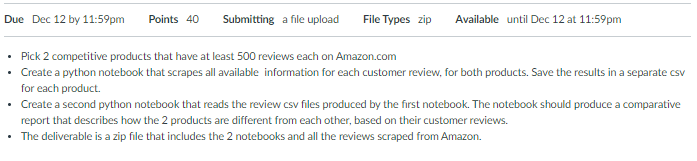

## Our group picked Wireless Earbuds from Appleand Samsung
##  Agree upon using the most recent 1,000 reviews for the comparison

## (1) Apple AirPods (2nd Generations) Product Descriptions on Amazon
- Wireless
- Bluetooth 
- Lightning Charging
- Over 24 hours of battery Life
- Effortless Setup for iPhone
- Price: $79.99
- https://www.amazon.com/Apple-AirPods-Charging-Latest-Model/dp/B07PXGQC1Q/ref=sr_1_3?crid=189TZWJJ9TE4V&keywords=Apple+AirPods&qid=1700491949&sprefix=apple+airpods%2Caps%2C72&sr=8-3&ufe=app_do%3Aamzn1.fos.18ed3cb5-28d5-4975-8bc7-93deae8f9840
- THe most recent 1,000 reviews will be considered (approx. ~600,000 ratings, ~40,000 reviews) 


## (2) Samsung Galaxy Buds2 Product Descriptions on Amazon
- Wireless
- Bluetooth
- Noise Cancelling/Ambient Sound/Lightweight Comfort Fit in Ear/Auto Switch Audio
- Long Battery Life
- Touch Control US Version/Graphite
- Price: $ 99.99
- https://www.amazon.com/Wireless-Cancelling-Bluetooth-Lightweight-Graphite/dp/B094242FV1/ref=sr_1_1_sspa?crid=PAGUZXC4SOUV&keywords=samsung%2Bgalaxy%2Bbuds2&qid=1700583875&sprefix=samsung%2Bgalaxy%2Bbuds2%2Caps%2C94&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1
- THe most recent 1,000 will be considered (approx. ~17,000 ratings, ~1400 reivews)

In [1]:
!pip3 install -U selenium
!pip3 install webdriver-manager

In [2]:
"""
!pip3 install -U selenium
!pip3 install webdriver-manager
"""
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import re, time, csv, requests 
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

In [3]:
"""
Go to Amazom see more reviews
parameter[in] : output file writer
return[out] : url for see_more_reviews
"""
def see_more_reviews(writer:csv.writer):
    delay:int = 5  
    try:
        next_button = WebDriverWait(driver, delay).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a[class="a-link-emphasis a-text-bold"]')))
        url_link=next_button.get_attribute('href')
    except Exception as e:  
        print('END: could not see more reviews')  
    return url_link

In [4]:
"""
Go to Amazom see more reviews
parameter[in] : output file writer
return[out] : url for see_more_reviews
"""
def see_all_reviews(writer:csv.writer):
    delay:int = 5  
    try:
        next_button = WebDriverWait(driver, delay).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a[data-hook="see-all-reviews-link-foot"]')))
        url_link=next_button.get_attribute('href')
        url_link='http://www.amazom.com'+url_link
    except Exception as e:  
        print('END: could not see more reviews')  
    return url_link

In [5]:
"""
Extracts all the reviews from the current page and writes to the specified writer
parameter[in] : output file writer
return[out] : total number of elements written in the output file
"""
def get_links_from_page(writer:csv.writer):
    delay:int = 5
    
    #get all reviews in the current page
    results=driver.find_elements(by=By.CSS_SELECTOR,value='div[class="a-section review aok-relative"]')
    
    print('N_REVIEWS: ', len(results))
    count =0;
    for result in results: 
        # Four elements to extract
        review_name,review_date,review_text,review_rating='NA','NA','NA','NA'  
        print()
        # Get review_name
        try: 
            name_box=result.find_element(by=By.CSS_SELECTOR,value='div[class="a-profile-content"]')
            name_box=name_box.find_element(by=By.CSS_SELECTOR,value='span[class="a-profile-name"]') 
            name=name_box.text
            print('NAME: ',name_box.text) 
        except NoSuchElementException as e: 
            print('ERROR: could not extract name')   
        
        # Get review_rating
        try:     
            rating_box=result.find_element(by=By.CSS_SELECTOR,value='div[class="a-row"]') 
            rating_box=rating_box.find_element(by=By.CSS_SELECTOR,value='i[data-hook="review-star-rating"]')  
            rating=rating_box.get_attribute('textContent')
            print('RATING: ',rating) 
        except NoSuchElementException as e:
            print('ERROR: could not extract rating')  
            
        # Get review_date
        try: 
            date_box=result.find_element(by=By.CSS_SELECTOR,value='span[data-hook="review-date"]') 
            date=date_box.text
            print('DATE: ',date_box.text) 
        except NoSuchElementException as e: 
            print('ERROR: could not extract date') 
            
        # Get review_text
        try: 
            text_box=result.find_element(by=By.CSS_SELECTOR,value='div[class="a-row a-spacing-small review-data"]')
            text_box=text_box.find_element(by=By.CSS_SELECTOR,value='span')
            text=text_box.text 
            print('REVIEW: ',text_box.text)   
        except NoSuchElementException as e:
            print('ERROR: could not extract text') 
            
        # Write all four elements using writer
        writer.writerow([name,rating,date,text])   
        count+=1;
         
    return len(results) 

In [6]:
"""
Create a scrape(driver, url) function
"""
def scrape(driver, url, output_file_name):
    delay:int = 5
        
    # Create a new csv writer for the story links
    fw=open(output_file_name,'w')
    writer=csv.writer(fw,lineterminator='\n')
    header= ['NAME','RATING','DATE','REVIEW']
    print('HEADER:', header)
    writer.writerow(header) 
    
    driver.get(url)  

    input()  

    page_cnt=0 
    total_reviews = 0 
    n_reviews = 0 
    
    while n_reviews<1000: #  
        print("PAGE:",page_cnt)
        
        #extract and write the links from the current page
        if page_cnt==0:
            see_more_reviews_url = see_more_reviews(url)
            print('See more reviews: href=\"',see_more_reviews_url,'\"')  
            
            driver.get(see_more_reviews_url) 
        else:
            print()
            print('PAGE:',page_cnt)   
            n_reviews = get_links_from_page(writer)
            total_reviews += n_reviews
            print()  
            print("n_reviews: ",n_reviews)
            print("total_reviews: ",total_reviews) 
            
            if n_reviews<90:
                # Next review page button
                try:
                    next_button = WebDriverWait(driver, delay).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'li[class="a-last"]')))
                except Exception as e:  
                    fw.close()
                    driver.quit()
                    print('END: no more reviews')
                    break

                # check if the next button is clickable
                if 'next' in next_button.get_attribute('class'):
                    print("loading next page,,,,") 

                # Click the next button and wait 
                next_button.click()
                driver.execute_script("arguments[0].click();", next_button)
                time.sleep(delay) 
            else:
                try:
                    result=driver.find_elements(by=By.CSS_SELECTOR,value='a[data-hook="see-all-reviews-link-foot"]')
                    url_link=result.get_attribute('href')
                    print()
                    print('search or filter all reviews',url_link)
                    all_reviews = 'http://www.amazon.com'+url_link 
                    print('all_reviews',all_reviews)
                    driver.get(all_reviews)
                except NoSuchElementException as e:
                    print('ERROR: could not extract all_reviews url')
                
        if total_reviews >= 1000:  
            print('END: total_reviews >= 1000')
            break
        page_cnt+=1 # increment  
    fw.close()
    driver.quit()

## Amazon allow us to scrape 100 Reviews ONLY into CSV: Samsung Galaxy Buds2  

In [7]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url='https://www.amazon.com/Wireless-Cancelling-Bluetooth-Lightweight-Graphite/dp/B094242FV1/ref=sr_1_4?crid=3VCRD94BU0NN&keywords=samsung%2Bearbuds%2Bgalaxy+buds+2&qid=1700583990&sprefix=samsung%2Bearbuds%2Bgalaxy+buds+2%2Caps%2C75&sr=8-4&ufe=app_do%3Aamzn1.fos.18ed3cb5-28d5-4975-8bc7-93deae8f9840'
output_file_name = 'samsung_earbuds_gen2.csv'
scrape(driver, url, output_file_name)
print()
print("\"samsung_earbuds_gen2.csv\" successfully created!")

HEADER: ['NAME', 'RATING', 'DATE', 'REVIEW']

PAGE: 0
See more reviews: href=" https://www.amazon.com/Wireless-Cancelling-Bluetooth-Lightweight-Graphite/product-reviews/B094242FV1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews "
PAGE: 1

PAGE: 1
N_REVIEWS:  10

NAME:  Ivan
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on October 12, 2023
REVIEW:  At first I truly HATED these earbuds. I used the galaxy buds plus before them and believed they were superior in every single way. I would still repurchase a pair of those if these current ones do stop working but one of the earbuds went through a full washer and dryer cycle and still works just fine. It will be kind of glitchy when attempting to charge them in the case but the sound quality was not changed at all. One thing that is unforgivable in my opinion and was an issue from day one is the buds and the cases battery life. Its comical how fast they will be dying after using them for maybe a few hours

NAME

NAME:  Jarrod
RATING:  1.0 out of 5 stars
DATE:  Reviewed in the United States on November 10, 2023
REVIEW:  My experience with Samsung's Galaxy Buds 2 was decidedly negative for a couple of small reasons and one big reason. To begin with the positives, the noise cancellation worked decently well. I don't have much of a baseline because I had never owned a noise cancelling product before, but they did what they advertised - made noisy spaces quieter such that I could get work done in an office where people were talking and the bus wasn't so loud as to give me a headache. Sound quality was okay. The battery life wasn't great (again, very little for me to compare to) but the fact that they could recharge in the case was neat and made limitations on the buds' battery life manageable. Because having them in for many hours is uncomfortable anyway, they always got a break to recharge in the case and they always seated well in their little charging spots.

That does bring up a point about com

RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on June 8, 2023
REVIEW:  As a user, I love the bugs. They are amazing for listening to music or calls. One really awesome feature I noticed the other day is we were at the neighborhood pool and I was sitting at the table (not wet) and put them in to listen to some music. I had not turned on my music yet, as soon as I put them it, it was like ear plugs, blocking ALL noise. I was sitting next to the "kiddie" pool which had "mushrooms" (towers that poured water out like a waterfall, and within 5 seconds, it sounded like my earbuds were playing ocean sounds. It knew the water was a soothing sound and actually piped them through to my ears while still blocking out the sound of our kids screaming and running around in the pool.

The ONLY complaint I have is about talking on phone. While it is great for me, I have only had complains about people not being able to hear me. I have used it in the car, people complain and connected 

DATE:  Reviewed in the United States on September 18, 2023
REVIEW:  They take too long to connect to a Samsung phone. Otherwise no problem unless you drop the case and they fall out. They should really try and fix that.

NAME:  Noah
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on September 21, 2023
REVIEW:  I got these for my mom and she loves them! The lavender is honestly my favorite color these come in and it worked out cause she love purple. One thing that really surprises me was the quick connect, she has a Galaxy S9 but even though her phone is older they instantly popped up and connected! Overall solid buds and you cant go wrong with these! (The buds3 are coming out relatively soon so take that into consideration also)

NAME:  Jeanette
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on October 29, 2023
REVIEW:  It was a present for my nephew

n_reviews:  10
total_reviews:  30
PAGE: 4

PAGE: 4
N_REVIEWS:  10

NAME:  Jeanine turner
RATING:  5.0

PAGE: 5

PAGE: 5
N_REVIEWS:  10

NAME:  corgi
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on July 18, 2023
REVIEW:  Been using these earbuds for about a year now and I can say that these sound really good for the price. The sound is pretty neutral compared to my Tin t3+ iems but is still enjoyable. The fit of the earbuds for me were pretty loose, even after trying all the ear tips that came with it. The earbuds would just slowly slip out of my ears, especially when exercising / sweating. I would say that if the earbuds fit in your ears, then its an excellent option for the price.

NAME:  David White
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on October 24, 2023
REVIEW:  Qualify

NAME:  Phillip Lewis-Emmer
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on July 5, 2023
REVIEW:  This was the next generation of their earbuds. I was satisfied with the prior set, but they were beginning to charge unevenly.

Playback of recorded med

RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on July 23, 2023
REVIEW:  They sound great and the anc works pretty well to cut grass with. Mine act weird about tapping though. If I ever tap on the left earbud the right will no longer work. Assume it's a software issue.

NAME:  sheila nguyen
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on July 12, 2023
REVIEW:  I have small ears and so alot of earbuds hurt me. I was able to wear these for hours no pain. I Love how you could change the audio to noise canceling or allow ambient noise. I could only get the tap function to stop music but not skip, haven't tried for calls yet.

NAME:  Mike McCourt
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on August 8, 2023
REVIEW:  Great when mowing the lawn with out using the big set of headphones.

n_reviews:  10
total_reviews:  60
PAGE: 7

PAGE: 7
N_REVIEWS:  10

NAME:  Arianna
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on 

NAME:  Jared Lovelady
RATING:  3.0 out of 5 stars
DATE:  Reviewed in the United States on December 8, 2022
REVIEW:  I tried all the tips. These things are simply just too big if you don't have large ear canals. I tried watching a video and even read hot to insert them properly. That wasnt the issue.
Even when I used the app and got it to say the fit "was good" they would fall out while sitting at my desk within minutes. God forbid I even tried to walk around with them and any time I bent down I could instantly feel them staying to slip out.

Additionally, the sound is pretty good, but if you use the ambient sound, even on low, it's echo-y. Having a washing machine or dryer on and ambient on low makes it sound like the washer and dryer are in front of my face vs in the other room 20 feet away. Every breath I take on low ambient is loud and distorted. I'm not a loud breather.

Noise cancellation is just okay, but not amazing. Maybe it's because they're too big for my ear canals? When the

DATE:  Reviewed in the United States on January 19, 2023
REVIEW:  One day I realized I lost my beloved Galaxy buds. I searched and searched for over two hours, but never found them. I continued to search on and off for several days, randomly lifting pillows, checking pockets of any new pants I put on, double-taking at acorns on bike rides. How I longed for my Galaxy buds!

My life moved on. My bike rides were lifeless. My Zoom meetings were embarrassing. I gave up... After three weeks, I ordered some cheap, poor-sounding alternatives to fill the void in my heart and resigned myself to them until I could stomach ordering a new pair of what I really wanted.

Well, wishes do come true. Just yesterday morning I was carrying my laundry down the stairs before stopping dead. I doubted what I had done. I felt my pockets. No keys. Monkeys! I locked myself out!

I walked a good sixteenth of a mile to the leasing office for my apartment complex to get their creepy master of the key to my home. On

DATE:  Reviewed in the United States on July 23, 2023
REVIEW:  I have bought "bargain" ear buds in the past. Now I don't know why I waited so long to get quality buds like these! The sound is incredible! So very different from the knock offs! These also have true noise canceling and also allow ambient, most of all they really work! Well when they went on sale, I took the plung, and happy I did!

NAME:  Seattle Cooks
RATING:  3.0 out of 5 stars
DATE:  Reviewed in the United States on July 26, 2023
REVIEW:  tldr; great buds *if* they stay in your ears - would recommend trying before you buy!
I have been wanting galaxy buds for a while now, finally got them but sadly had to return because I could not get them to stay in my ears. Despite using the fit testing feature they were falling out with minimal movement (eg standing from a chair). Otherwise these were much higher quality than my airpods in every other aspect; sound quality was great, they were very noise cancelling (though difficult

In [8]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url='https://www.amazon.com/Apple-AirPods-Charging-Latest-Model/dp/B07PXGQC1Q/ref=sr_1_3?crid=189TZWJJ9TE4V&keywords=Apple+AirPods&qid=1700491949&sprefix=apple+airpods%2Caps%2C72&sr=8-3&ufe=app_do%3Aamzn1.fos.18ed3cb5-28d5-4975-8bc7-93deae8f9840'
output_file_name = 'apple_earbuds_gen2.csv'
scrape(driver, url, output_file_name)
print()
print("\"apple_earbuds_gen2.csv\" successfully created!")

HEADER: ['NAME', 'RATING', 'DATE', 'REVIEW']

PAGE: 0
See more reviews: href=" https://www.amazon.com/Apple-AirPods-Charging-Latest-Model/product-reviews/B07PXGQC1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews "
PAGE: 1

PAGE: 1
N_REVIEWS:  10

NAME:  renee
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on October 19, 2023
REVIEW:  Taking the Apple AirPods at face value, they're a solid headset for the money! If you already have the original, first generation AirPods and just want to upgrade, not a bad option either. The 2nd generation AirPods feature an improved software chip & runs off of BlueTooth 5.0 vs 4.1 (Gen 1). The software chip allows a faster, stronger, and more stable connection with your device(s). This particular item for $139.00 does NOT feature the wireless charging case. This one must be plugged in via USB (cable provided in the box) to an outlet or USB port. The wireless charging case model is $169. Now if you're looking to upgrade to

RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on October 19, 2023
REVIEW:  I love Apple products. Why? Because they are simple and work great. I've used generic earbuds before and they use to annoy the hell out of me. No matter how many earpieces I use, they always manage to pop out of my ears at the worst possible time. Try finding your earbud that fell on to the floor of a packed subway car. Not fun. I have the generation 2 as well as the generation 2 pro. Generation 2 Pro wins hands down but it is pricey. For the average user, who doesn't need all the bells and whistles, gen 2 is just fine. But, be warn, there are limited functions by touch. There is stop/play/forward/rewind. The noise cancellation is above average. The sound quality is also above average. When using it on calls, the sound is clear and crisp. If you have an iPhone, it pairs automatically. On rare occasions, the airpods become disconnected and I have to manually pair them again. I don't know why th

NAME:  Amazon Customer
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on November 22, 2023
REVIEW:  Can’t believe it took me this long to try Air Pods. They sound EXCELLENT. Easy to use. Super comfy. My only qualm is the lid of the case feels like it will 100% break one day if it catches anything in motion so just be careful. Really do love these headphones though.

NAME:  Boxman
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on October 22, 2023
REVIEW:  I’ve never used an apple airpod prior to 2023 but so far its been a good experience. I use this casually and at work. The airpods do have some difficulty staying on my ear at first but the problem goes away after my ears get used to the shape. There are some touch control things in the pod itself, but its just play, pause, restart/back a track, and vice versa.

This airpod doesn’t have noise cancellation, its got no silicone tips to enclose your ear. Because of that, its very good in environments whe

REVIEW:  I love my AirPods. I thought about getting the AirPods Pro but I didn’t wanna spend that much more just to have the noise canceling feature. Now I will probably upgrade in a year or two now that they’ve even improved the AirPods Pro even more.

Coming from somebody who has an iPad and iPhone and an iMac at home having the AirPods and the ability to Switch between them so effortlessly without having to unpair and repair is so nice.
I’ve had a number of Bluetooth headsets over the years from Plantronics to generic to a number of other different companies I don’t even know if I could remember every different manufacture that I’ve had. I always hated that they were bulky they never fit in my ear just right. I just never felt like they were great and it was always complicated they seem to fuss to pair up and especially if they ever unpaired then it was starting all over again. I love that the minute that I got my AirPods I flipped open the case and right away my iPhone registers th

DATE:  Reviewed in the United States on November 15, 2023
REVIEW:  I can talk on the phone, watch TV, listen to my computer and batteries last for a long time. The case recharges the ear plugs quickly and keeps them safe when plugs are not in use. I would buy again.

NAME:  Review Mate
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on November 12, 2023
REVIEW:  I love air pods to listen to music and go through a workout routine, they may not be waterproof, but they make it through a shower. Take care and happy shopping.

NAME:  Carmen G.
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on November 8, 2023
REVIEW:  Es un gran cambio de pasar de audifonos de cable a estos AirPods, son super cómodos, fáciles de llevar. Y la batería dura un montón!

NAME:  JAT
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on November 5, 2023
REVIEW:  They have great sound quality and stay charged for a long time too. Easy to use and lightweight. Works gr

REVIEW:  I got this during a prime day sale, and it was one of my better financial decisions, as the audio is high quality, the case holds a charge for days at a time, and the headphones are really lightweight in my ears. I’ve tried to get by with cheaper Bluetooth headphones in the past, and this made me realize I should’ve just bought this and saved myself the time. It’s also easy to customize as you can buy protective cases for it.

NAME:  Amazon Customer
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on September 30, 2023
REVIEW:  My husband and I both bought a set of these iPods. We love them! When we bought them, they were on a special offer. The charge lasts a long time and charging them is quick.

NAME:  geoff glantz
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on October 15, 2023
REVIEW:  I can listen to music at the gym the iPods last through my whole workout, errands and still have plenty of battery power.

NAME:  Akiro.S
RATING:  5.0 ou

DATE:  Reviewed in the United States on September 26, 2023
REVIEW:  I always stared away from these because the wired versions were always so uncomfortable when earbuds used to come with iPhones. I have smaller ears so I figured they wouldn't stay in my ears right or they would hurt. I've always been a user of the Skullcandy wireless earbuds but now they're getting to the point where they are $60, $70, or $80 there really isn't that big of a deal in spending a little bit more. And I'm very glad that I did the sound is 10 times better it's way louder. Definitely better it definitely works with your iPhone better!

NAME:  Terrible laser
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on November 1, 2023
REVIEW:  These AirPods are the best headphones they have great battery life and the sound awesome the base is awesome and they are great quality

NAME:  Vick
RATING:  4.0 out of 5 stars
DATE:  Reviewed in the United States on October 31, 2023
REVIEW:  I love the general i

RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on September 22, 2023
REVIEW:  Crispy chicken volleyball is a wonderful way to start the day. Listening to sand, or leaning on a bench slide. Find your new in water or purple. Meaningless words for a review that needs no explanation. Buy the AirPods for under $100. If you have weird ears like me, they won’t fall out.

NAME:  Lukas Thomas
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on October 18, 2023
REVIEW:  I don't like the new AirPods so I'm glad I can still buy these old ones. Works like a charm!

NAME:  Gregory Evans
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on November 4, 2023
REVIEW:  Prefer these over and other AirPods batter life is pretty good charges fast and fits in your ears pretty good.

NAME:  Susan Goldsand
RATING:  5.0 out of 5 stars
DATE:  Reviewed in the United States on October 4, 2023
REVIEW:  Love these Air buds, they work perfectly and fit better in my ear

In [1]:
import csv
import nltk # the most popular library for text mining
#nltk.download()
from nltk.tokenize import sent_tokenize,word_tokenize

In [2]:
#function that loads a lexicon of positive words to a set and returns the set
def loadLexicon(fname):
    newLex=set()
    lex_conn=open(fname)
    
    #add every word in the file to the set
    for line in lex_conn:
        newLex.add(line.strip())# remember to strip to remove the lin-change character
    lex_conn.close()

    return newLex


In [14]:
def getOpinions(input_file, feature_num):
    
    #load the positive and negative lexicons into sets
    posLex=loadLexicon('positive-words.txt')
    negLex=loadLexicon('negative-words.txt')

    noun_sentiment={}#maps each noun to the number of times it appears in the same sentence as a positive or negative word
        
    fin=open(input_file,encoding='utf8')

    reader=csv.reader(fin)
    
    for line in reader: # for each review

        name,rating,date,text=line # get the text and rating
    
        sentences=sent_tokenize(text) # split the review into sentences

        for sentence in sentences: # for each sentence
        
            words=word_tokenize(sentence) # split the review into words
        
            tagged_words=nltk.pos_tag(words) # POS tagging for the words in the sentence
                #https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

            nouns_in_sentence=set() # set of all the nouns in the sentence
        
            sentiment_word_count=0 # number of positive or negative words in the sentence
        
    
            for tagged_word in tagged_words:
            
                if tagged_word[1].startswith('NN'): # if the word is a noun

                    noun=tagged_word[0].lower() # lower case the noun
                    
                    if len(noun)<3:continue # ignore nouns with less than 3 characters
                                
                    nouns_in_sentence.add(noun) # add the noun to the set
                
                if (tagged_word[0] in posLex or tagged_word[0] in negLex): 
                    sentiment_word_count+=1
                   
        
            for noun in nouns_in_sentence: # for each noun that we found in the sentence
                noun_sentiment[noun]=noun_sentiment.get(noun,0)+sentiment_word_count

    fin.close()

    #sort noun based on their total polarity counts (pos+neg)
    sorted_nouns=sorted(noun_sentiment.items(),key=lambda x:x[1],reverse=True)

    
    #get the top feature_num features
    top=sorted_nouns[:feature_num]

    return top

In [16]:
result=getOpinions('samsung_earbuds_gen2.csv',15)

for noun in result:
    print(noun)

('buds', 177)
('earbuds', 163)
('sound', 150)
('noise', 135)
('quality', 109)
('ears', 107)
('case', 89)
('galaxy', 82)
('samsung', 82)
('battery', 64)
('ear', 63)
('time', 58)
('life', 45)
('fit', 45)
('touch', 42)


In [17]:
result=getOpinions('apple_earbuds_gen2.csv',15)

for noun in result:
    print(noun)

('airpods', 191)
('sound', 105)
('apple', 103)
('quality', 94)
('case', 85)
('ears', 67)
('earbuds', 59)
('noise', 54)
('ear', 53)
('wireless', 51)
('generation', 49)
('cancellation', 46)
('life', 43)
('iphone', 42)
('calls', 40)
